In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

data collection and pre-processing


In [2]:
from google.colab import files
upload = files.upload()

Saving spam.csv to spam.csv


In [3]:
df = pd.read_csv('spam.csv',encoding = 'latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.shape

(5572, 5)

In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
df= df.drop(columns =['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['v1']=encoder.fit_transform(df['v1'])
df['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

In [28]:
df.head()


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


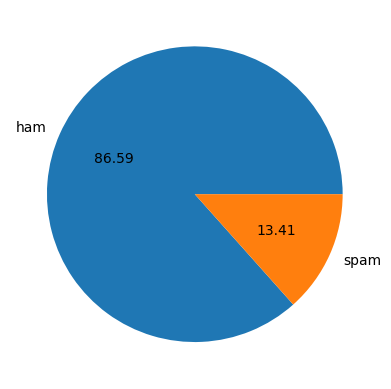

In [30]:
plt.pie(df['v1'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [31]:
x=df['v2']
y=df['v1']

In [32]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [33]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64

splitting data   for the test and train

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [35]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn import svm

In [36]:
cv=CountVectorizer()

In [37]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [38]:
print(x_train_cv)

  (0, 4655)	1
  (0, 3491)	1
  (0, 7720)	2
  (0, 1032)	1
  (0, 3365)	1
  (0, 3235)	2
  (0, 2178)	2
  (0, 3497)	1
  (0, 6873)	1
  (0, 6805)	1
  (0, 4431)	1
  (0, 7464)	1
  (0, 946)	1
  (0, 3042)	1
  (0, 4908)	1
  (0, 4108)	1
  (0, 3360)	1
  (0, 741)	1
  (1, 7704)	1
  (1, 6645)	1
  (1, 3646)	1
  (1, 6620)	1
  (1, 7099)	1
  (1, 4190)	1
  (2, 7720)	1
  :	:
  (4455, 847)	1
  (4455, 6956)	2
  (4455, 1561)	1
  (4455, 1615)	1
  (4455, 3767)	1
  (4455, 3888)	1
  (4455, 4647)	1
  (4455, 6991)	1
  (4455, 1592)	1
  (4455, 6850)	1
  (4455, 6316)	1
  (4455, 7402)	1
  (4455, 4383)	1
  (4455, 2164)	1
  (4455, 7668)	1
  (4455, 7618)	1
  (4455, 2849)	1
  (4455, 6563)	1
  (4455, 6636)	1
  (4455, 1179)	1
  (4456, 7513)	1
  (4456, 4703)	1
  (4456, 1431)	1
  (4456, 6334)	1
  (4456, 6312)	1


In [39]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() #creating model

In [40]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)


In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, prediction_train)*100)

99.75319721785955


In [42]:
prediction_test = lr.predict(x_test_cv)

In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction_test)*100)

98.56502242152466
